# Introduction to Data Analysis and Plotting in Python

* Introduce Pandas for data handling and analysis
* Use Matplotlib, Seaborn and Bokeh for visualization
* interactive with simple exercises along the way

## What is pandas?

* Pandas provides structures for working with data (`Series`, `DataFrame`)

* Data structures have **methods** for manipulating data eg. indexing, sorting, grouping, filling in missing data

* Pandas does not provide modeling tools eg. regression, prediction
    * These tools are found in packages such as `scikit-learn` and `statsmodels`, which are built on top of pandas

## DataFrames

A `DataFrame` combines multiple 'columns' of data into a two-dimensional object, similar to a spreadsheet

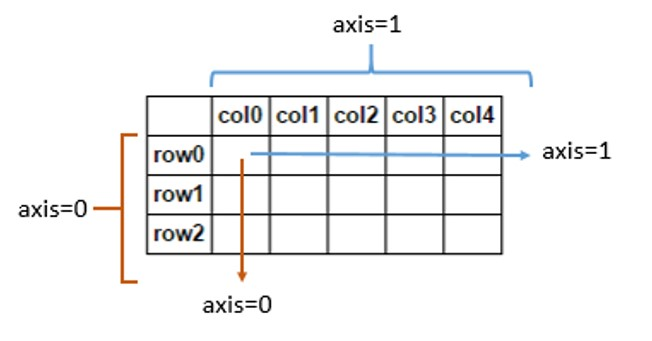

In [1]:
from IPython.display import Image
Image('./dataframe.jpg')

We will create a `DataFrame` by reading in a CSV file and assigning it to the variable name `majors`

### Info on the data set

* The data come from ['The Economic Guide to Picking a College Major'](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/), Fivethirtyeight magazine
* Other interesting datasets can be found on the Fivethirtyeight GitHub: https://github.com/fivethirtyeight/data/

In [2]:
import pandas as pd

majors = pd.read_csv('recent-grads.csv')
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

We can access individual columns of data, returning a `Series`

In [4]:
majors['Major'].head()

0                        PETROLEUM ENGINEERING
1               MINING AND MINERAL ENGINEERING
2                    METALLURGICAL ENGINEERING
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING
4                         CHEMICAL ENGINEERING
Name: Major, dtype: object

We can also select multiple columns, returning a new dataframe

In [5]:
majors[['Major', 'ShareWomen']].head()

,Major,ShareWomen
0,PETROLEUM ENGINEERING,0.120564
1,MINING AND MINERAL ENGINEERING,0.101852
2,METALLURGICAL ENGINEERING,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.107313
4,CHEMICAL ENGINEERING,0.341631


We can add a new column to our dataframe like so

In [6]:
majors['Employment rate'] = majors['Employed'] / majors['Total']
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,0.602544
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.796466


If we want to know the average unemployment rate...

In [7]:
majors['Unemployment_rate'].mean() * 100

6.819083091329481

`.describe()` returns useful summary statistics 

In [8]:
majors['Unemployment_rate'].describe()

count    173.000000
mean       0.068191
std        0.030331
min        0.000000
25%        0.050306
50%        0.067961
75%        0.087557
max        0.177226
Name: Unemployment_rate, dtype: float64

Pandas also provides a simple way to generate matplotlib plots

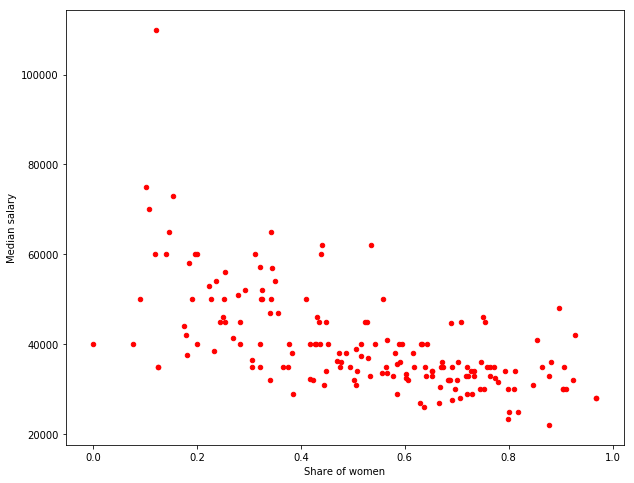

In [10]:
import matplotlib.pyplot as plt

majors.plot(x='ShareWomen', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Share of women')
plt.ylabel('Median salary')
plt.show()

### Exercises

#### Find the mean number of full-time and part-time workers across majors

#### Find the median number of people in low wage jobs

#### Create a table of summary statistics for the unemployment and employment rates

#### Create a table of summary statistics for major's categories

#### Create a new variable equal to the proportion of workers who are part time

#### Plot the part time rate against the share of women

## Selecting and filtering

We can use integer slicing to select rows as follows

In [12]:
majors[:3]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009


We might want to find the majors with the highest share of women

First we will sort our values by a column in the dataframe

In [13]:
majors.sort_values(by='ShareWomen', ascending=False)[:3]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,20748,1360,0.040105,28000,21000,35000,23515,7705,2868,0.865971
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,14460,1487,0.047584,28000,20000,40000,19957,9404,5125,0.777528
51,52,6104,MEDICAL ASSISTING SERVICES,11123.0,803.0,10320.0,Health,0.927807,67,9168,...,4290,407,0.042507,42000,30000,65000,2091,6948,1270,0.824238


Another way to select rows is to use row labels, ie. set a row index

Similar to the column labels, we can add row labels (the index)

In [14]:
majors.set_index('Major_code').head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
2419,1,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
2416,2,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2415,3,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009
2417,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,...,692,40,0.050125,70000,43000,80000,529,102,0,0.602544
2405,5,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.796466


Note: we haven't actually changed the DataFrame `majors`

In [15]:
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,0.602544
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.796466


Need to overwrite `majors` with the new copy

In [16]:
majors = majors.set_index('Major_code')   # Can also use majors.set_index('Major_code', inplace=True)
majors.head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
2419,1,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.844805
2416,2,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,...,388,85,0.117241,75000,55000,90000,350,257,50,0.846561
2415,3,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,...,340,16,0.024096,73000,50000,105000,456,176,0,0.757009
2417,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,...,692,40,0.050125,70000,43000,80000,529,102,0,0.602544
2405,5,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.796466


In [17]:
majors.loc[2405]

Rank                                       5
Major                   CHEMICAL ENGINEERING
Total                                  32260
Men                                    21239
Women                                  11021
Major_category                   Engineering
ShareWomen                          0.341631
Sample_size                              289
Employed                               25694
Full_time                              23170
Part_time                               5180
Full_time_year_round                   16697
Unemployed                              1672
Unemployment_rate                  0.0610977
Median                                 65000
P25th                                  50000
P75th                                  75000
College_jobs                           18314
Non_college_jobs                        4440
Low_wage_jobs                            972
Employment rate                     0.796466
Name: 2405, dtype: object

In [18]:
code_list = [6102, 5001]

majors.loc[code_list]

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
6102,164,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,19975,...,14460,1487,0.047584,28000,20000,40000,19957,9404,5125,0.777528
5001,8,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,...,827,33,0.021167,62000,31500,109000,972,500,220,0.851562


We can also sort our index (this is recommended for efficient selecting and filtering)

In [19]:
majors.sort_index(inplace=True)
majors.head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
1100,65,GENERAL AGRICULTURE,10399.0,6053.0,4346.0,Agriculture & Natural Resources,0.417925,158,8884,7589,...,5888,178,0.019642,40000,30000,50000,2418,4717,839,0.854313
1101,64,AGRICULTURE PRODUCTION AND MANAGEMENT,14240.0,9658.0,4582.0,Agriculture & Natural Resources,0.321770,273,12323,11119,...,9093,649,0.050031,40000,25000,50000,1925,6221,1362,0.865379
1102,72,AGRICULTURAL ECONOMICS,2439.0,1749.0,690.0,Agriculture & Natural Resources,0.282903,44,2174,1819,...,1528,182,0.077250,40000,27000,54000,535,893,94,0.891349
1103,153,ANIMAL SCIENCES,21573.0,5347.0,16226.0,Agriculture & Natural Resources,0.752144,255,17112,14479,...,10824,917,0.050862,30000,22000,40000,5443,9571,2125,0.793214
1104,22,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,2558,...,1735,338,0.096931,53000,32000,70000,1183,1274,485,NaN


Alternatively, we can filter our dataframe (select rows) using *boolean conditions*

In [20]:
majors['Major_category'] == 'Arts'

Major_code
1100    False
1101    False
1102    False
1103    False
1104    False
1105    False
1106    False
1199    False
1301    False
1302    False
1303    False
1401    False
1501    False
1901    False
1902    False
1903    False
1904    False
2001    False
2100    False
2101    False
2102    False
2105    False
2106    False
2107    False
2201    False
2300    False
2301    False
2303    False
2304    False
2305    False
        ...  
6005     True
6006    False
6007     True
6099     True
6100    False
6102    False
6103    False
6104    False
6105    False
6106    False
6107    False
6108    False
6109    False
6110    False
6199    False
6200    False
6201    False
6202    False
6203    False
6204    False
6205    False
6206    False
6207    False
6209    False
6210    False
6211    False
6212    False
6299    False
6402    False
6403    False
Name: Major_category, Length: 173, dtype: bool

Selecting rows with this boolean condition will return only rows of the dataframe where `Major_cateogory == 'Business'` is `True`

In [21]:
majors[majors['Major_category'] == 'Business']

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
6200,58,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,171385,...,138299,14946,0.072861,40000,30000,55000,29334,100831,27320,0.810704
6201,41,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,151967,...,123169,12411,0.069749,45000,34000,56000,11417,39323,10886,0.833331
6202,7,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,...,2482,308,0.095652,62000,53000,72000,1768,314,259,0.770982
6203,77,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,251540,...,199897,21502,0.072218,38000,29000,50000,36720,148395,32395,0.837258
6204,28,OPERATIONS LOGISTICS AND E-COMMERCE,11732.0,7921.0,3811.0,Business,0.324838,156,10027,9639,...,7724,504,0.047859,50000,40000,60000,1466,3629,285,0.854671
6205,38,BUSINESS ECONOMICS,13302.0,7575.0,5727.0,Business,0.430537,199,10914,10048,...,8000,1165,0.096448,46000,33000,58000,1578,4612,1284,0.820478
6206,78,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,156668,...,127230,11663,0.061215,38000,30000,50000,25320,93889,27968,0.871600
6207,36,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,137921,...,108595,9413,0.060686,47000,35000,64000,24243,48447,9910,0.834905
6209,87,HUMAN RESOURCES AND PERSONNEL MANAGEMENT,24497.0,6184.0,18313.0,Business,0.747561,264,20760,18550,...,15446,1315,0.059570,36000,28000,45000,2406,9629,1906,0.847451


In [22]:
majors[(majors['Major_category'] == 'Business') & (majors['Total'] > 100000)]

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_code,,,,,,,,,,,,,,,,,,,,,
6200,58,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,171385,...,138299,14946,0.072861,40000,30000,55000,29334,100831,27320,0.810704
6201,41,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,151967,...,123169,12411,0.069749,45000,34000,56000,11417,39323,10886,0.833331
6203,77,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,251540,...,199897,21502,0.072218,38000,29000,50000,36720,148395,32395,0.837258
6206,78,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,156668,...,127230,11663,0.061215,38000,30000,50000,25320,93889,27968,0.871600
6207,36,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,137921,...,108595,9413,0.060686,47000,35000,64000,24243,48447,9910,0.834905


### Exercises

#### How many college majors in the sample have a median salary above $50,000?
* Hint: use `len()` to find the length of a dataframe

#### How many Business majors have a median salary above $50,000?

#### Of all Business majors, which has the highest median salary?

## Grouping and aggregating data

We might want to summarize our data by grouping it by major categories

To do this, we will use the `.groupby()` function

In [24]:
grouped = majors.groupby('Major_category')
grouped

In [25]:
grouped.groups

{'Agriculture & Natural Resources': Int64Index([1100, 1101, 1102, 1103, 1104, 1105, 1106, 1199, 1302, 1303], dtype='int64', name='Major_code'),
 'Arts': Int64Index([6000, 6001, 6002, 6003, 6004, 6005, 6007, 6099], dtype='int64', name='Major_code'),
 'Biology & Life Science': Int64Index([1301, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609,
             3611, 3699, 4006],
            dtype='int64', name='Major_code'),
 'Business': Int64Index([6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6209, 6210, 6211,
             6212, 6299],
            dtype='int64', name='Major_code'),
 'Communications & Journalism': Int64Index([1901, 1902, 1903, 1904], dtype='int64', name='Major_code'),
 'Computers & Mathematics': Int64Index([2001, 2100, 2101, 2102, 2105, 2106, 2107, 3700, 3701, 3702, 4005], dtype='int64', name='Major_code'),
 'Education': Int64Index([2300, 2301, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311,
             2312, 2313, 2314, 2399, 3501],
            dtype='in

To return an *aggregated* dataframe, we need to specify the function we would like pandas to use to aggregate our groups

In [26]:
grouped.mean()

,Rank,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment rate
Major_category,,,,,,,,,,,,,,,,,,,
Agriculture & Natural Resources,101.500000,8402.222222,4484.111111,3918.111111,0.405267,110.400000,6694.300000,5814.300000,1659.100000,4362.600000,382.400000,0.056328,36900.000000,25400.000000,48010.000000,1986.000000,3449.100000,789.900000,0.860603
Arts,131.125000,44641.250000,16798.750000,27842.500000,0.603658,407.500000,36014.250000,25971.625000,14348.875000,19138.875000,3528.500000,0.090173,33062.500000,21962.500000,43662.500000,11848.125000,20465.000000,7514.500000,0.815670
Biology & Life Science,95.357143,32418.714286,13208.500000,19210.214286,0.587193,165.500000,21628.357143,17169.785714,8338.285714,11843.000000,1632.428571,0.060918,36421.428571,26614.285714,46085.714286,10802.357143,9084.428571,3053.000000,0.700543
Business,55.846154,100182.769231,51373.230769,48809.538462,0.483198,1192.692308,83749.384615,76066.923077,15148.923077,60801.923077,6144.384615,0.071064,43538.461538,33461.538462,54846.153846,11426.000000,38197.692308,9752.923077,0.829638
Communications & Journalism,104.000000,98150.250000,32980.250000,65170.000000,0.658384,1127.000000,82665.000000,68332.500000,22454.250000,53557.000000,6713.000000,0.075538,34500.000000,26250.000000,44975.000000,21639.000000,43248.000000,12398.750000,0.844534
Computers & Mathematics,57.000000,27182.545455,18975.000000,8207.545455,0.311772,260.000000,21626.727273,18867.727273,4842.727273,14468.727273,1670.272727,0.084256,42745.454545,29290.909091,58090.909091,12532.636364,6769.363636,1466.909091,0.799617
Education,130.375000,34945.562500,6470.375000,28475.187500,0.748507,296.375000,29989.937500,24878.687500,7537.062500,18001.937500,1560.562500,0.051702,32350.000000,26590.625000,38562.500000,21169.562500,7610.062500,2554.375000,0.856697
Engineering,22.620690,18537.344828,14079.551724,4457.793103,0.238889,169.862069,14495.586207,13167.827586,2935.724138,9963.862069,1028.172414,0.063334,57382.758621,41555.172414,70448.275862,9302.310345,3530.448276,864.793103,0.787311
Health,96.500000,38602.500000,6293.083333,32309.416667,0.795152,326.166667,31012.250000,24568.250000,9549.333333,19034.833333,1851.083333,0.065920,36825.000000,26166.666667,50250.000000,20453.416667,9208.000000,2605.833333,0.758078


In [27]:
grouped['Median'].mean()

Major_category
Agriculture & Natural Resources        36900.000000
Arts                                   33062.500000
Biology & Life Science                 36421.428571
Business                               43538.461538
Communications & Journalism            34500.000000
Computers & Mathematics                42745.454545
Education                              32350.000000
Engineering                            57382.758621
Health                                 36825.000000
Humanities & Liberal Arts              31913.333333
Industrial Arts & Consumer Services    36342.857143
Interdisciplinary                      35000.000000
Law & Public Policy                    42200.000000
Physical Sciences                      41890.000000
Psychology & Social Work               30100.000000
Social Science                         37344.444444
Name: Median, dtype: float64

In [28]:
grouped['Median'].agg(['mean', 'median', 'std'])

,mean,median,std
Major_category,,,
Agriculture & Natural Resources,36900.000000,35000,6935.416354
Arts,33062.500000,30750,7223.164621
Biology & Life Science,36421.428571,36300,4528.912006
Business,43538.461538,40000,7774.052832
Communications & Journalism,34500.000000,35000,1000.000000
Computers & Mathematics,42745.454545,45000,5108.691346
Education,32350.000000,32750,3892.728263
Engineering,57382.758621,57000,13626.079747
Health,36825.000000,35000,5776.460854


A list of built-in aggregatation functions can be found [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

Pandas provides methods to plot from GroupBy objects

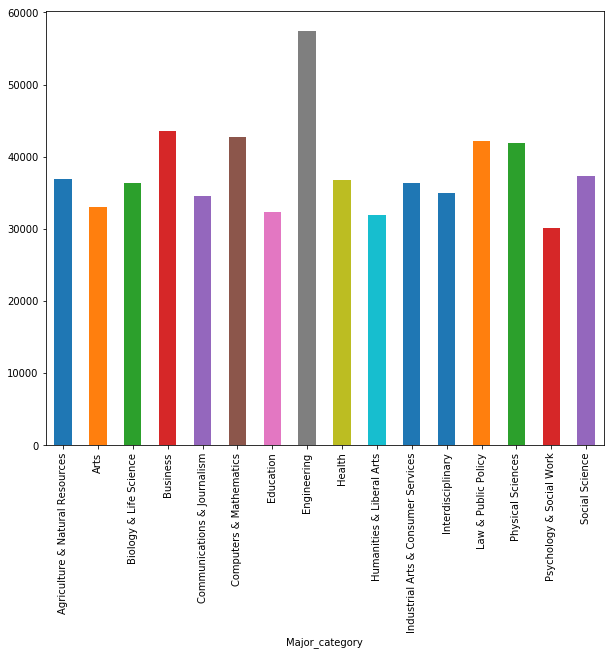

In [29]:
import matplotlib.pyplot as plt

grouped['Median'].mean().plot(kind='bar', figsize=(10, 8))
plt.show()

### Exercise

#### Return the mean of the share of women for each major category and sort from highest to lowest, plot the result as a bar plot

## Another plotting library: `seaborn`

* `seaborn` is a plotting library built on top of `matplotlib`

* It is geared towards producing pretty plots for statistical applications

* You can find an example gallery of `seaborn` plots [here](https://seaborn.pydata.org/examples/index.html)

In [30]:
import seaborn as sns  # Import the package

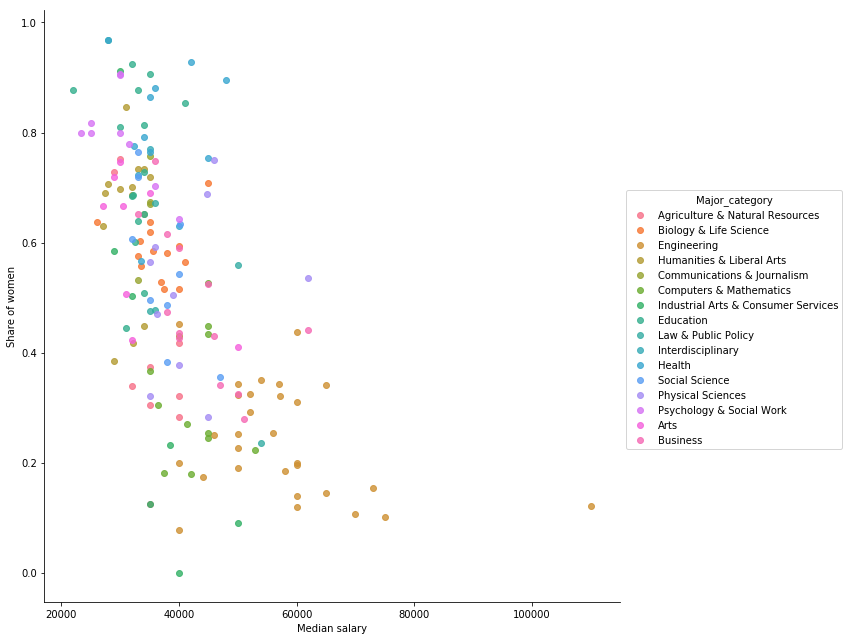

In [31]:
sns.lmplot(x="Median", y="ShareWomen", hue="Major_category", size=9, data=majors, fit_reg=False)
plt.xlabel('Median salary')
plt.ylabel('Share of women')
plt.show()

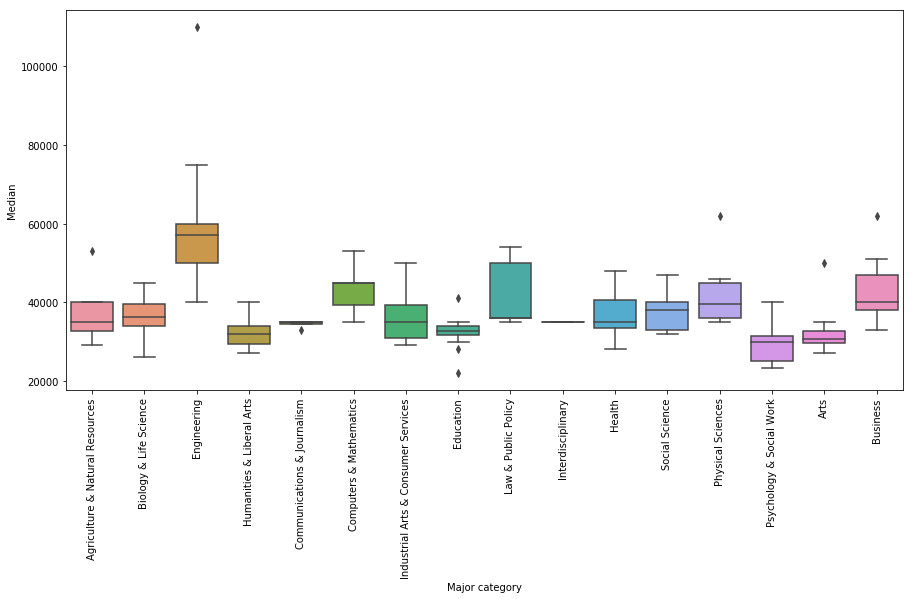

In [32]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Major_category', y='Median', data=majors)
plt.xticks(rotation=90)
plt.xlabel('Major category')
plt.show()

## Bokeh example

Bokeh is a Python library that makes creating interactive plots super easy - an example gallery is [here](http://bokeh.pydata.org/en/latest/docs/gallery.html)

In [33]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.palettes import Category20

output_notebook()

# Add title tooltips
hover = HoverTool(tooltips=[
    ("Title", "@Major"),
    ("Share", "$y"),
    ("Median salary", "$x{$0,}")
])


# Create figure
p = figure(tools=[hover, 'pan', 'wheel_zoom'])

# List of majors
majors_list = majors['Major_category'].unique()

# Plot scatter
for major, color in zip(majors_list, Category20[20]):
    
    # Filter data based on major color catergory
    source_major = majors[majors['Major_category'] == major]
    
    # Create data source
    source = ColumnDataSource(source_major[['Major', 'Major_category', 'ShareWomen', 'Median']])
    p.scatter(x='Median', y='ShareWomen', source=source, 
              size=10, legend='Major_category',
              fill_color=color, line_color='grey')

p.legend.click_policy = 'hide'
p.legend.location = "top_right"
p.legend.label_text_font_size = "8pt"
p.xaxis.axis_label = 'Median salary'
p.yaxis.axis_label = 'Share of Women'
p.xaxis[0].formatter = NumeralTickFormatter(format="$0,")

show(p)

Loading BokehJS ...

## Other resources

Here are some free, online resources for learning pandas/matplotlib:

* QuantEcon lectures: [Pandas](https://lectures.quantecon.org/py/pandas.html), [Pandas for Panel Data](https://lectures.quantecon.org/py/pandas_panel.html), [Matplotlib](https://lectures.quantecon.org/py/matplotlib.html)
* QuantEcon [Stata-R-Pandas cheatsheet](https://cheatsheets.quantecon.org/stats-cheatsheet.html)
* SciPy 2017: [Anatomy of Matplotlib](https://www.youtube.com/watch?v=rARMKS8jE9g)
* Coursera/University of Michigan: [Introduction to Data Science in Python](https://www.coursera.org/learn/python-data-analysis)